In [1]:
%pip install -q numpy pandas matplotlib seaborn ipywidgets IPython

Note: you may need to restart the kernel to use updated packages.


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive, interact, FloatSlider

1. Use las transformaciones de Herglotz para demostrar que la velocidad transforma de acuerdo con:

  $$
  \vec{v}_L^{\prime}=\frac{\vec{v}_L+\left(\frac{\gamma_u-1}{u_L^2} \vec{u}_L \cdot \vec{v}_L-\gamma_u\right) \vec{u}_L}{\gamma_u\left(1-\vec{u}_L \cdot \vec{v}_L\right)}
  $$
  donde se ha usado otra vez unidades relativistas, i.e. $\vec{u}_L = \vec{V}/c$ y $\vec{v}_L = \vec{v}/c$ y $\gamma_u = 1/\sqrt{1-u_L^2}$. Es importante reconocer aquí la diferencia entre $\vec V$ (la velocidad relativa de los sistemas de referencia) y $\vec v$ la velocidad del objeto que es observado (una partícula, una estrella, etc.)

2. Demuestre que estas ecuaciones pueden escribirse en términos de las componentes paralela y perpendicular de la velocidad como:

  $$
  \begin{aligned}
v_{L\parallel}^{\prime} & =\frac{v_{L\parallel}-u_L}{1-\vec{u}_L\cdot\vec{v}_{L}} \\
v_{L\perp}^{\prime} & =\frac{v_{L\perp}}{\gamma\left(1-u_L v_{L x}\right)}
\end{aligned}
$$
 y demuestre que independientemente de la dirección, un rayo de luz siempre será observado con la misma velocidad, $c$, confirmando el principio de constancia de la velocidad de la luz.

3. Vamos a representar gráficamente las transformaciones de velocidades. Para ello vamos a suponer que desde el origen de coordenadas del sistema del experimento (O') salen partículas con rapidez idéntica $v_L$ en todas direcciones.

    a. Escoja N direcciones del espacio y dibuje usando `quiver` (o un comando análogo) los vectores de velocidad correspondientes a cada dirección.

    b. Aplique las reglas de conversión de velocidades en la configuración estándar para encontrar las componentes de la velocidad medidas en el laboratorio. El gráfico se debe parece a la figura abajo.

    c. Construya un código interactivo que le permita modificar tanto la velocidad relativa entre los sistemas de referencia $u_L$ y la rapidez de las partículas $v_L$.

    d. Escoja $v_L=1$ (fotones). ¿Qué diferencias observa entre el caso de $v_L<1$ y el caso de los fotones?.

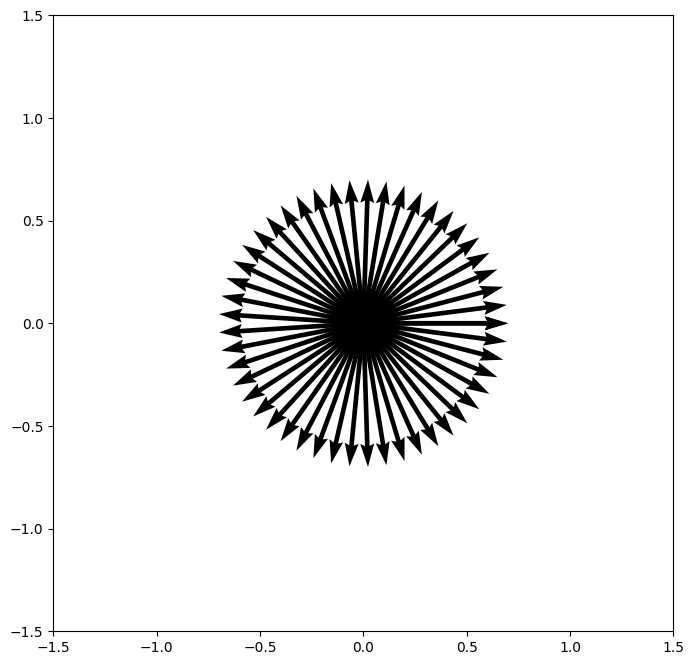

In [22]:
#elegimos n direcciones en el espacio
n = 50

#las parametrizamos con la direccion
thetas = np.linspace(0, 2 * np.pi, n)

#todos tienen la misma magnitud = vl
vl = 0.7

#graficamos los puntos con quiver
x = vl * np.cos(thetas)
y = vl * np.sin(thetas)
plt.figure(figsize=(8, 8))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.quiver(np.zeros(n), np.zeros(n), x, y, angles='xy', scale_units='xy', scale=1)

Importante tener en cuenta: La fuente está en el sistema S' y quiero ver como son para S (como son medidas), para ello, se cambia u_L por -u_L, y entonces 

$$v_{Lx\text{medido}} = \frac{(v_Lx + u_L)}{(1 + v_Lx * u_L)}$$
$$v_{Ly\text{medido}} = \frac{(v_Ly)}{(1 + v_Lx * u_L)}$$

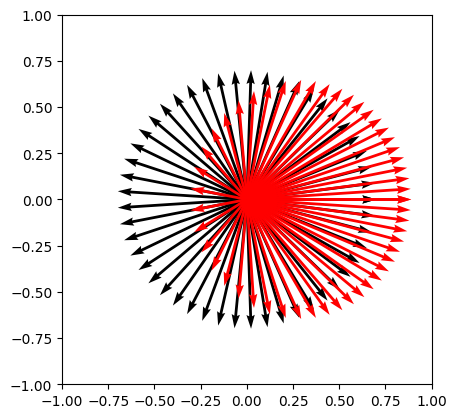

In [23]:
#ahora, usamos las reglas de transformación  de velocidades, para enconrar las componentes de velocidad medidas en el laboratoria

u_L = 0.5
v_L = 0.7
gamma_u = 1.0 / np.sqrt(1 - u_L**2)

#análogo al recién realizado
v_Lx = v_L * np.cos(thetas)
v_Ly = v_L * np.sin(thetas)

#tranformaciones de las velocidades
denm = 1 + v_Lx * u_L # c=1

v_Lx_medido = (v_Lx + u_L) / denm
v_Ly_medido = v_Ly / (gamma_u * denm)


plt.quiver(np.zeros(n), np.zeros(n), v_Lx, v_Ly,
               angles='xy', scale_units='xy', scale=1, color='black', label="Velocities in O' (Source Frame)")

# Plot red arrows (transformed velocities in Lab O)
plt.quiver(np.zeros(n), np.zeros(n), v_Lx_medido, v_Ly_medido,
            angles='xy', scale_units='xy', scale=1, color='red', label="Velocities in O (Lab Frame)")


plt.xlim(-1, 1)
plt.ylim(-1, 1)
#ejes del mismo tamaño
plt.gca().set_aspect('equal', adjustable='box')

In [28]:
def velocidades_tranformadas(u_L, v_L):
    gamma_u = 1.0 / np.sqrt(1 - u_L**2)

    n = 50
    thetas = np.linspace(0, 2 * np.pi, n)
    
    v_Lx = v_L * np.cos(thetas)
    v_Ly = v_L * np.sin(thetas)
    denm = 1 + v_Lx * u_L 

    v_Lx_medido = (v_Lx + u_L) / denm
    v_Ly_medido = v_Ly / (gamma_u * denm)

    plt.quiver(np.zeros(n), np.zeros(n), v_Lx, v_Ly,
               angles='xy', scale_units='xy', scale=1, color='black', label="Vel's en O'")

    plt.quiver(np.zeros(n), np.zeros(n), v_Lx_medido, v_Ly_medido,
                angles='xy', scale_units='xy', scale=1, color='red', label="Vel's en O")

    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.title(f"u_L = {u_L:.2f}, v_L = {v_L:.2f}")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.show()

#crear el interactivo
interactive_plot = interact(velocidades_tranformadas,
                            u_L=FloatSlider(min=0, max=0.99, step=0.01, value=0.5, description="$u_L$"),
                            v_L=FloatSlider(min=0, max=1.0, step=0.01, value=0.7, description="$v_L$"))


interactive(children=(FloatSlider(value=0.5, description='$u_L$', max=0.99, step=0.01), FloatSlider(value=0.7,…